# Hypothesis Testing

We will conduct a hypothesis test on employees salary and check if their salaries have increased in subsequent years

* Tests we will be using
    1. Z test
    2. T test
    3. F/Anova test

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

In [2]:
df=pd.read_csv('data.csv')

C:\Users\srija\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,24,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,...,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
0,111391,2014,Water And Power (DWP),NaN,1412316577,Commercial Service Representative,Full Time,NaN,$70386.48,$16129.89,...,NaN,98,1230,NaN,$16842.08,$1282.61,$0.00,$18124.69,DWP,http://per.lacity.org/perspecs/1230.pdf
1,31732,2013,Police (LAPD),4301.0,432728338,Police Officer I,Full Time,$25.12,$52450.56,$11331.00,...,POLICE OFFICERS UNIT,70,2214,A,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
2,27697,2013,Police (LAPD),4301.0,97182506,Police Officer II,Full Time,$42.77,$89303.76,$20036.32,...,POLICE OFFICERS UNIT,70,2214,2,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
3,14136,2013,Harbor (Port of LA),3201.0,950136941,Senior Security Officer,Full Time,$28.75,$60028.96,$15793.88,...,SUPV BLUE COLLAR,42,3184,0,$10710.24,$405.24,$11.40,$11126.88,City,http://per.lacity.org/perspecs/3184.pdf
4,91896,2014,Public Works - Sanitation,7024.0,3230003445,Senior Clerk Typist,Full Time,$30.92,$64553.13,$14700.00,...,CLERICAL UNIT,82,1368,0,$11000.40,$409.68,$11.40,$11421.48,City,http://per.lacity.org/perspecs/1368.pdf


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285008 entries, 0 to 285007
Data columns (total 35 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Row ID                        285008 non-null  int64  
 1   Year                          285008 non-null  int64  
 2   Department Title              285008 non-null  object 
 3   Payroll Department            231463 non-null  float64
 4   Record Number                 285008 non-null  object 
 5   Job Class Title               285008 non-null  object 
 6   Employment Type               285008 non-null  object 
 7   Hourly or Event Rate          263987 non-null  object 
 8   Projected Annual Salary       285008 non-null  object 
 9   Q1 Payments                   285008 non-null  object 
 10  Q2 Payments                   285008 non-null  object 
 11  Q3 Payments                   285008 non-null  object 
 12  Q4 Payments                   285008 non-nul

In [5]:
df.isna().sum()

Row ID                              0
Year                                0
Department Title                    0
Payroll Department              53545
Record Number                       0
Job Class Title                     0
Employment Type                     0
Hourly or Event Rate            21021
Projected Annual Salary             0
Q1 Payments                         0
Q2 Payments                         0
Q3 Payments                         0
Q4 Payments                         0
Payments Over Base Pay              0
% Over Base Pay                     0
Total Payments                      0
Base Pay                            0
Permanent Bonus Pay                 0
Longevity Bonus Pay                 0
Temporary Bonus Pay                 0
Lump Sum Pay                    42264
Overtime Pay                      434
Other Pay & Adjustments             0
Other Pay (Payroll Explorer)        0
MOU                             21021
MOU Title                       21021
FMS Departme

In [6]:
for i in ['Projected Annual Salary','Q1 Payments','Q2 Payments','Q3 Payments','Q4 Payments','Payments Over Base Pay',
          'Total Payments','Base Pay','Permanent Bonus Pay','Longevity Bonus Pay','Temporary Bonus Pay','Overtime Pay',
          'Other Pay & Adjustments','Other Pay (Payroll Explorer)','Average Health Cost','Average Dental Cost',
          'Average Basic Life','Average Benefit Cost']:
    df[i]=df[i].str.replace('$','')

In [7]:
df.head()

,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,...,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
0,111391,2014,Water And Power (DWP),NaN,1412316577,Commercial Service Representative,Full Time,NaN,70386.48,16129.89,...,NaN,98,1230,NaN,16842.08,1282.61,0.00,18124.69,DWP,http://per.lacity.org/perspecs/1230.pdf
1,31732,2013,Police (LAPD),4301.0,432728338,Police Officer I,Full Time,$25.12,52450.56,11331.00,...,POLICE OFFICERS UNIT,70,2214,A,11651.40,898.08,191.04,12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
2,27697,2013,Police (LAPD),4301.0,97182506,Police Officer II,Full Time,$42.77,89303.76,20036.32,...,POLICE OFFICERS UNIT,70,2214,2,11651.40,898.08,191.04,12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
3,14136,2013,Harbor (Port of LA),3201.0,950136941,Senior Security Officer,Full Time,$28.75,60028.96,15793.88,...,SUPV BLUE COLLAR,42,3184,0,10710.24,405.24,11.40,11126.88,City,http://per.lacity.org/perspecs/3184.pdf
4,91896,2014,Public Works - Sanitation,7024.0,3230003445,Senior Clerk Typist,Full Time,$30.92,64553.13,14700.00,...,CLERICAL UNIT,82,1368,0,11000.40,409.68,11.40,11421.48,City,http://per.lacity.org/perspecs/1368.pdf


In [8]:
df=df[df['Projected Annual Salary']!=0]

In [9]:
df['Projected Annual Salary']=df['Projected Annual Salary'].astype(float)
df['Base Pay']=df['Base Pay'].astype(float)

C:\Users\srija\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Projected Annual Salary', ylabel='Density'>

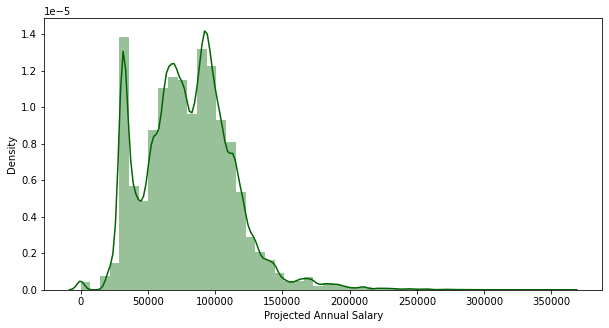

In [10]:
plt.figure(figsize=(10,5))
sns.distplot(df['Projected Annual Salary'],color='darkgreen')

In [11]:
df_2015=df[df['Year']==2015]
df_2016=df[df['Year']==2016]

In [12]:
import statistics

print("2015 year population mean of pay: ", df_2015['Projected Annual Salary'].mean())
print("2015 year population standard dev. of pay", statistics.stdev(df_2015['Projected Annual Salary']))

2015 year population mean of pay:  79089.18237722886
2015 year population standard dev. of pay 34230.02855425747


In [13]:
print("2016 year population mean of pay: ", df_2016['Projected Annual Salary'].mean())

df_2016_sample=df_2016.sample(frac=0.1)

print("2016 year sample population mean of pay:", df_2016_sample['Projected Annual Salary'].mean())
print("2016 year sample population standard dev. of pay:", statistics.stdev(df_2016_sample['Projected Annual Salary']))


2016 year population mean of pay:  81360.4570367112
2016 year sample population mean of pay: 81055.3918997379
2016 year sample population standard dev. of pay: 33358.15040125872


#### Hypothesis Testing

* Normal distribution

1. Null Hypothesis : Pay does not increase in 2016
2. Alternate Hypothesis: It increases
3. Population parameters: Mean = pop_mean_2015, standard deviation = pop_std_2015
4. Sample parameters : Mean = sample_mean_2016, standard deviation = sample_std_2016

Z Test = (x̄ – μ) / (σ / √n)

In [14]:
import math

z_score_test_stats = ((df_2016_sample['Projected Annual Salary'].mean()-df_2015['Projected Annual Salary'].mean())
                      *math.sqrt(len(df_2016_sample['Projected Annual Salary']))/statistics.stdev(df_2015['Projected Annual Salary']))

In [15]:
z_score_test_stats

6.04933849330112

* For 95% confidence interval, Z-score is (-1.65,1.65). Since our Z score statistics falls outside the acceptance region, we reject the null hypothesis.
* Hence, annual salaries increased in 2016

#### Type 1 type 2 hypothesis error
In statistical hypothesis testing, a type I error is the incorrect rejection of a true null hypothesis (a "false positive"), while a type II error is incorrectly retaining a false null hypothesis (a "false negative")

* Let's check the true value of population characteristics for 2016

In [16]:
pop_mean_2016=df_2016['Projected Annual Salary'].mean()
pop_mean_2015=df_2015['Projected Annual Salary'].mean()

pop_std_2016=statistics.stdev(df['Projected Annual Salary'])

In [17]:
zscore_error=(pop_mean_2016-pop_mean_2015)/pop_std_2016

In [18]:
zscore_error

0.06787171042372778

* We can clearly see that we encountered a Type 1 error as the population mean is well within acceptable region

#### T- Distribution Testing

* Normal distribution

1. Null Hypothesis : Pay does not increase in 2016
2. Alternate Hypothesis: It increases
3. Population parameters: Mean = pop_mean_2015, standard deviation = pop_std_2015
4. Sample parameters : Mean = sample_mean_2016, standard deviation = sample_std_2016

In [20]:
df_2014=df[df['Year']==2014]

In [21]:
df_2015_sample=df_2015.sample(frac=0.00062)

N=len(df_2015_sample)

sample_mean_2015=df_2015_sample['Projected Annual Salary'].mean()
sample_std_2015=statistics.stdev(df_2015_sample['Projected Annual Salary'])

pop_mean_2014=df_2014["Projected Annual Salary"].mean()
pop_std_2014=statistics.stdev(df_2014["Projected Annual Salary"])

In [23]:
t_score_test_stats=((sample_mean_2015-pop_mean_2014)*math.sqrt(N))/sample_std_2015

t_score_test_stats

0.3864045451847736

* Depeinding upon the confidence interval and t test table, we can accept or reject the hypothesis

#### F Distribution and ANOVA

* The means from three different samples are compared using ANOVA.
* It is similar to applying t-tests over multiple sample ANOVA.

Let's compare electrician's salary from 2014, 2015 and 2016 and see if their base salaries have changed or not

In [24]:
df_2014_elec=df_2014[df_2014["Job Class Title"]=='Electrician']
df_2015_elec=df_2015[df_2015["Job Class Title"]=='Electrician']
df_2016_elec=df_2016[df_2016["Job Class Title"]=='Electrician']

sample_elec_2014=df_2014_elec.sample(frac=0.47)
sample_elec_2014_mean=sample_elec_2014['Base Pay'].mean()

sample_elec_2015=df_2015_elec.sample(frac=0.41)
sample_elec_2015_mean=sample_elec_2015['Base Pay'].mean()

sample_elec_2016=df_2016_elec.sample(frac=0.22)
sample_elec_2016_mean=sample_elec_2016['Base Pay'].mean()


In [25]:
print("Mean of Electrician base pay for 2014 is ",sample_elec_2014_mean)
print("Mean of Electrician base pay for 2015 is ",sample_elec_2015_mean)
print("Mean of Electrician base pay for 2016 is ",sample_elec_2016_mean)

Mean of Electrician base pay for 2014 is  71915.65054054053
Mean of Electrician base pay for 2015 is  76411.14249999999
Mean of Electrician base pay for 2016 is  33338.63918918919


In [26]:
f,p = stats.f_oneway(sample_elec_2014['Base Pay'],sample_elec_2015['Base Pay'],sample_elec_2016['Base Pay'])


In [27]:
print("F value: ",f)
print("P value: ",p)

F value:  76.77803645374159
P value:  2.0956459368997402e-21


* P value is very low, hence null hypothesis is rejected